In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('PYTORCH_NOTEBOOKS/Data/iris.csv')

In [22]:
df.head()
print(df['target'].unique())

[0. 1. 2.]


In [4]:
df.shape

(150, 5)

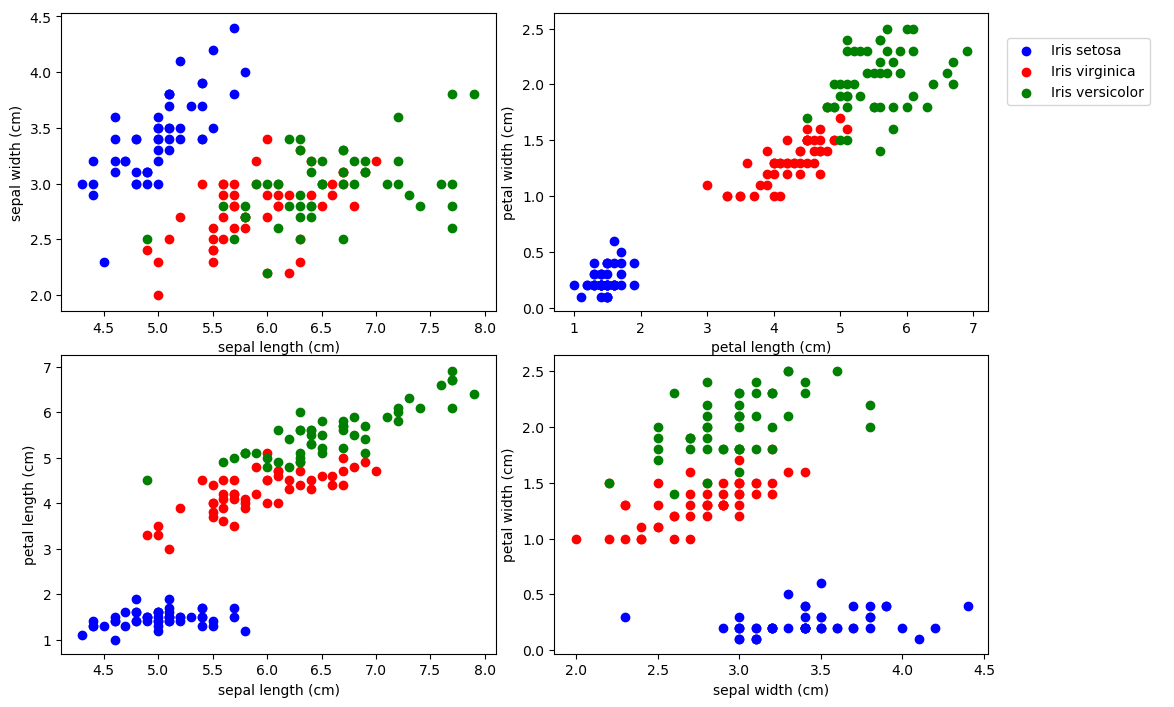

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
features = df.drop('target',axis=1).values
label = df['target'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=33)


In [9]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [10]:
y_test

tensor([[1],
        [1],
        [0],
        [1],
        [2],
        [2],
        [0],
        [0],
        [2],
        [2],
        [2],
        [0],
        [2],
        [1],
        [2],
        [1],
        [2],
        [0],
        [1],
        [2],
        [0],
        [0],
        [2],
        [0],
        [2],
        [2],
        [1],
        [1],
        [2],
        [2]])

## Pytorch Built in utilities

In [12]:
from torch.utils.data import TensorDataset, DataLoader

In [15]:
data = df.drop('target',axis=1).values
labels = df['target'].values

In [16]:
iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [17]:
len(iris)

150

In [18]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [25]:
# Batches - Splitting the dataset into small groups
iris_loader = DataLoader(iris,batch_size=10,shuffle=True) # no of rows

In [26]:
for i_batch, sample_batch in enumerate(iris_loader):
    print(i_batch,sample_batch)

0 [tensor([[6.6000, 2.9000, 4.6000, 1.3000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.3000, 2.9000, 5.6000, 1.8000]]), tensor([1, 0, 0, 2, 1, 0, 0, 1, 2, 2])]
1 [tensor([[5.1000, 3.3000, 1.7000, 0.5000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [5.0000, 3.4000, 1.6000, 0.4000]]), tensor([0, 1, 0, 0, 1, 2, 1, 2, 0, 0])]
2 [tensor([[6.0000, 3.0000, 4.8000, 1.8000],
        [5.6000, 3.0000, 